In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

[[ 3.01558832e-01 -4.16578010e-01  6.10640578e+02]
 [-3.52409114e-01  7.46522970e-01  3.74915773e+02]
 [-3.36916184e-04  8.13237585e-05  1.00000000e+00]]


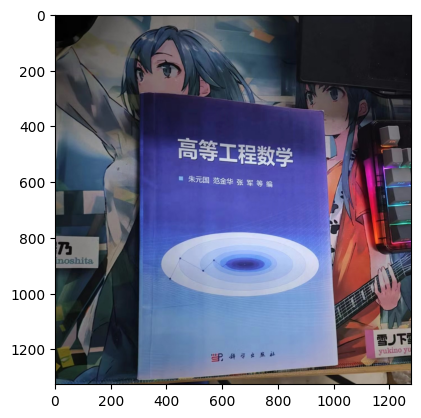

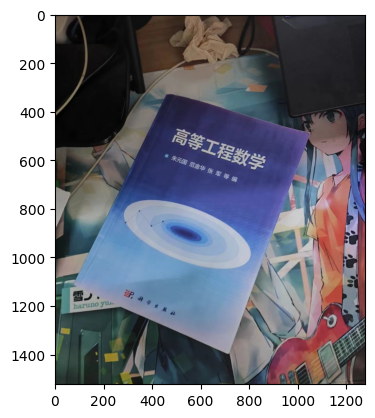

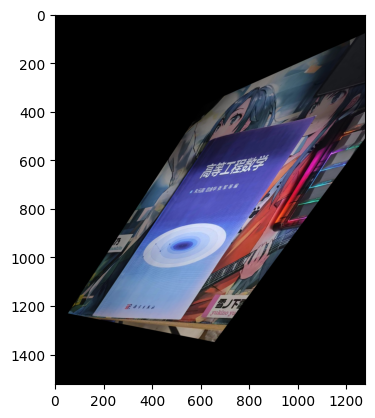

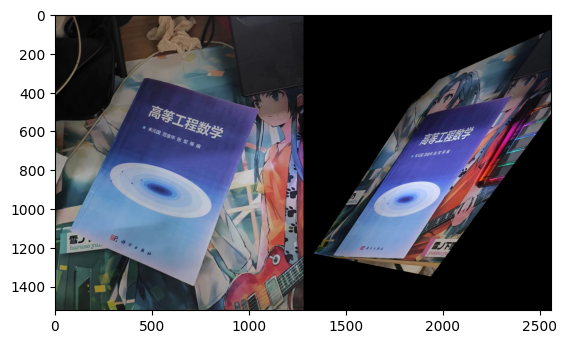

(<matplotlib.image.AxesImage at 0x21b9c8db8b0>, None)

In [3]:
# 读取待匹配的两张图像
img1 = cv2.imread('./images/image1.jpg')
img2 = cv2.imread('./images/image2.jpg')

# 将图像转换为灰度图
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# 使用SIFT特征检测器和描述符提取器
sift = cv2.SIFT_create()

# 寻找关键点和描述符
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# 使用FLANN匹配器进行特征点匹配
flann = cv2.FlannBasedMatcher()
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# 根据最近邻和次近邻的距离比率进行筛选
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# 提取匹配点的坐标
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

# 使用RANSAC算法估计单应性变换矩阵
# H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
H,_ = cv2.findHomography(src_pts,dst_pts)
print(H)
# 将第一张图像映射到第二张图像上
warped_img = cv2.warpPerspective(img1, H, (img2.shape[1], img2.shape[0]))

# 将两张图像拼接在一起进行对比显示
result = np.concatenate((img2, warped_img), axis=1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
warped_img = cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(img1),plt.show()
plt.imshow(img2),plt.show()
plt.imshow(warped_img),plt.show()
plt.imshow(result),plt.show()